# AST 7939 Homework Assignment #4 (10 pts)

## All work is due Wednesday March 22 at 5 pm.

## Instruction: 
Do all homework in this Jupyter notebook and submit your final .ipynb file via Canvas. Show ALL your work and try to add comment lines as needed to describe what your code does. 

You are encouraged to discuss homework problems with your classmates. However, your python script and answers to the questions must be written by yourself.

### 1. Clustering (4 pts)

In this homework problem, we will use DBSCAN to cluster stars in the Orion complex, inspired by [Chen et al. (2020)]( https://ui.adsabs.harvard.edu/abs/2020A%26A...643A.114C/abstract). In that paper, the authors used Shared Nearest Neighbor (SNN), a modified version of DBSCAN, which we did not cover during this course. We will use DBSCAN instead. We will use the same Gaia data set which the authors made publicly available on this Github repository: https://github.com/BoquanErwinChen/GaiaDR2_Orion_Dissection. You can find the data file in the HiPerGator class share folder as well as on Canvas.

### Let's read in the Gaia data.

In [1]:
import pandas as pd

filename = "Orion_data_20190924.csv"
df = pd.read_csv(filename)
df.dropna(subset=['ra', 'dec', 'parallax', 'pmra', 'pmdec'])
df = df.reset_index(drop=True)

In [2]:
df

,ra,ra_error,dec,dec_error,source_id,parallax,parallax_error,pmra,pmra_error,pmdec,...,phot_rp_mean_mag,bp_rp,radial_velocity,radial_velocity_error,teff_val,a_g_val,e_bp_min_rp_val,radius_val,lum_val,ruwe
0,75.254413,0.191960,-3.397018,0.139120,3213149215497176960,2.794918,0.212409,-2.617536,0.408962,1.669195,...,17.211597,2.672356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.909273
1,75.561670,0.234429,-4.866204,0.206860,3212376190103379584,3.165823,0.280067,-2.495638,0.511235,0.305570,...,17.622894,2.886185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.033360
2,75.052364,0.067621,-3.386506,0.052373,3213160421067816320,2.819880,0.073171,3.840388,0.135597,0.344070,...,15.534090,2.050842,NaN,NaN,3860.6667,0.2240,0.1140,NaN,NaN,1.001610
3,75.021177,0.103251,-4.005701,0.078453,3212679487809861248,2.669342,0.123817,0.160382,0.229156,-0.794245,...,15.949252,3.309411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.957134
4,75.179643,0.030784,-6.085392,0.026767,3211380620978873344,3.635541,0.038434,-1.479837,0.063476,-1.582998,...,9.450638,0.358518,NaN,NaN,8049.0000,0.5495,0.3030,NaN,NaN,1.243121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29025,89.445830,0.194402,6.615502,0.185320,3321921839250935424,2.963123,0.234839,3.694528,0.367675,-2.861006,...,16.974401,2.873224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.022000
29026,89.129035,0.025935,6.574493,0.026383,3322578251987928576,2.348265,0.031663,-2.595891,0.048980,-1.927499,...,13.123673,1.322178,NaN,NaN,4863.4053,0.8170,0.4082,0.937234,0.442744,1.047600
29027,89.368736,0.152991,6.784836,0.146842,3322675691910202368,4.136481,0.186160,-3.831424,0.303003,-2.835496,...,16.644974,2.890482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.997614
29028,89.196556,0.030407,6.698468,0.028375,3322676074163325952,2.695094,0.032618,-3.342518,0.061107,-3.943541,...,14.011317,1.566079,NaN,NaN,4465.4100,0.6405,0.3232,0.659014,0.155571,1.015678


In [3]:
df.keys()

Index(['ra', 'ra_error', 'dec', 'dec_error', 'source_id', 'parallax',
       'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'dec_parallax_corr', 'dec_pmdec_corr', 'dec_pmra_corr',
       'parallax_pmdec_corr', 'parallax_pmra_corr', 'pmra_pmdec_corr',
       'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr',
       'duplicated_source', 'phot_g_mean_flux', 'phot_g_mean_flux_error',
       'phot_g_mean_mag', 'phot_bp_mean_flux', 'phot_bp_mean_flux_error',
       'phot_bp_mean_mag', 'phot_rp_mean_flux', 'phot_rp_mean_flux_error',
       'phot_rp_mean_mag', 'bp_rp', 'radial_velocity', 'radial_velocity_error',
       'teff_val', 'a_g_val', 'e_bp_min_rp_val', 'radius_val', 'lum_val',
       'ruwe'],
      dtype='object')

### Spatial distribution of the stars on the sky

Text(0, 0.5, 'Dec (deg)')

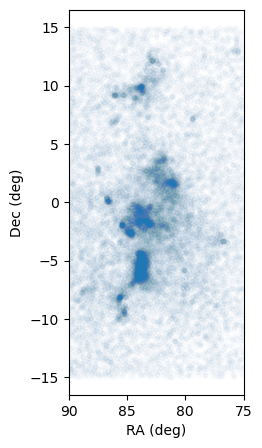

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5))

ax.plot(df.ra, df.dec, '.', alpha=0.01)
ax.set_xlim(90,75)
ax.set_aspect('equal')
ax.set_xlabel('RA (deg)')
ax.set_ylabel('Dec (deg)')


For DBSCAN, there are two hyperparameters to optimize: epsilon & min_samples. We should explore a grid of models to optimize the hyperparameters, but for the sake of computing time let's fix **min_samples = 10** and try to **find a "good" epsilon value**. To do so, let's adopt what has been done in [Castro-Ginard et al. (2018)]( https://ui.adsabs.harvard.edu/abs/2018A%26A...618A..59C/abstract). See their Section 2.2 and Figure 3. To briefly summarize, we generate a random sample having the same number of stars to our dataset (i.e., 29,030), where the features are drawn "randomly". The idea is that, if the stars are all "field stars", not cluster stars, then the distribution of each astrometric parameter would follow normal distribution and would be different from that of cluster stars.

(a) Among various parameters in the data file, we will use RA, Dec, parallax, RA proper motions RA (pmra), Dec proper motions (pmdec). Make an array containing this information. 

Then, generate a new random sample of the same number of stars to the original data, according to the distribution of each astrometric parameter estimated using a Gaussian kernel density estimator. In other words, compute the mean and standard deviation of each of the astrometric parameter of the original data, and generate a random sample which follows a normal (Gaussian) distribution having the computed mean and standard deviation. You can use ```numpy.random.normal``` for this. 

DBSCAN requires feature scaling, so apply feature scaling for the two samples (individually). (1 pt) 

In [5]:
import numpy as np

# Put features into array X
X = np.array([df.ra, df.dec, df.parallax, df.pmra, df.pmdec]).T
feature_names = ['RA', 'Dec', 'parallax', 'RA proper motion', 'Dec proper motion'] #this might be helpful for plotting later


# Generate a new random samples
num_stars = len(df.ra) # number of stars in the original data

ra_rand = np.random.normal(np.mean(df.ra), np.std(df.ra), num_stars)
dec_rand = np.random.normal(np.mean(df.dec), np.std(df.dec), num_stars)
parallax_rand = np.random.normal(np.mean(df.parallax), np.std(df.parallax), num_stars)
pmra_rand = np.random.normal(np.mean(df.pmra), np.std(df.pmra), num_stars)
pmdec_rand = np.random.normal(np.mean(df.pmdec), np.std(df.pmdec), num_stars)
# Put the new random samples into an array X_rand
X_rand = np.array([ra_rand, dec_rand, parallax_rand, pmra_rand, pmdec_rand]).T



In [6]:
X.shape, X_rand.shape

((29030, 5), (29030, 5))

In [7]:
# Perform feature scaling
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit(X).transform(X)
X_rand_scaled = StandardScaler().fit(X_rand).transform(X_rand)



(b) For the two samples, compute the distance to the 10th nearest neighbor for each data point (hint: use ```sklearn.neighbors.NearestNeighbors```). Then, make histograms showing the distance to the 10th nearest neighbor. Your plot should look similar to Figure 3 of [Castro-Ginard et al. (2018)]( https://ui.adsabs.harvard.edu/abs/2018A%26A...618A..59C/abstract). If you want to do a statistically more rigorous job, you can draw many random samples (say 100) and take an average of the bootstrapped samples. (1 pt)


In [8]:
from sklearn import neighbors

# Create a kNN model
model = neighbors.NearestNeighbors(n_neighbors=10)
# Fit to the original data
model.fit(X_scaled)
# Compute distance to the 10 nearest neighbors for each data point
dist, ind = model.kneighbors(X_scaled, n_neighbors=10, return_distance=True)

# dist[0] # distances
# dist[0][:,9].shape #10th nearest neighbor
# nn = dist[0][:,9] #10th nearest neighbor

nn = dist[:,-1] #distance to 10th nearest neighbor

nn.shape


(29030,)

In [9]:
# Fit to the random sample data
model.fit(X_rand_scaled)
# Compute the distance to the 10 nearest neighbors for each data point
dist, ind = model.kneighbors(X_rand_scaled, n_neighbors=10, return_distance=True)
# distance to 10th nearest neighbor for each data point:
nn_rand = dist[:,-1]

In the Castro-Ginard (2018) paper, they computed epsilon as the average of the two minimum distances:

$$
\epsilon = (\epsilon_{kNN}+\epsilon_{rand})/2
$$

I will attempt to use this same method to choose $\epsilon$,

In [10]:
# Compute epsilon using the logic above
epsilon = (np.min(nn)+np.min(nn_rand))/2
epsilon

0.1894166191696245

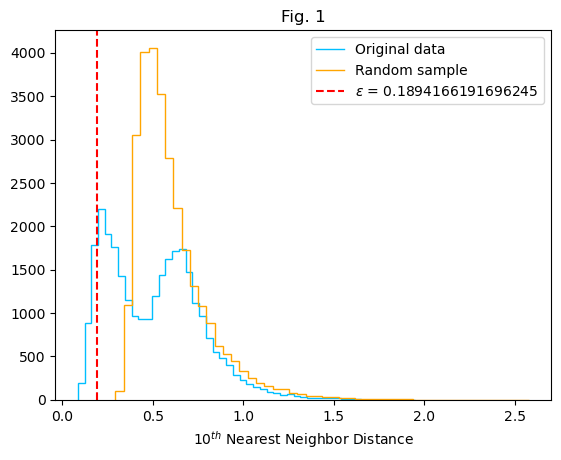

In [15]:
counts, bins = np.histogram(nn, bins=50)
plt.stairs(counts, bins, fill=False, color='deepskyblue', label='Original data')

counts, bins = np.histogram(nn_rand, bins=50)
plt.stairs(counts, bins, fill=False, color='orange', label='Random sample')

plt.axvline(epsilon, color='red', label='$\epsilon$ = '+str(epsilon), linestyle='--')

plt.legend()
plt.xlabel('10$^{th}$ Nearest Neighbor Distance')
plt.title('Fig. 1');


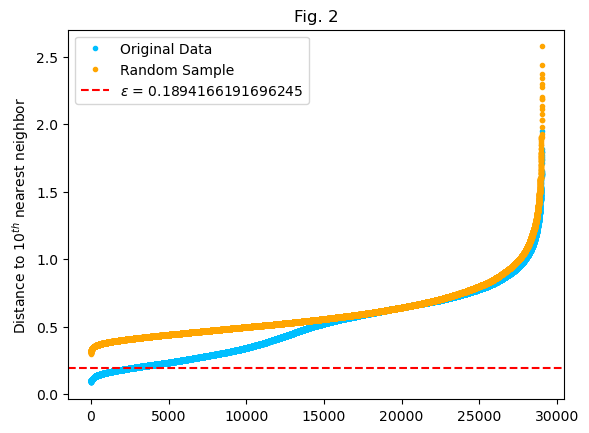

In [19]:
dist = np.sort(nn, axis=0)
plt.plot(dist, '.', label='Original Data', color='deepskyblue')
dist = np.sort(nn_rand, axis=0)
plt.plot(dist, '.', label='Random Sample', color='orange')

plt.axhline(epsilon, color='red', label='$\epsilon$ = '+str(epsilon), linestyle='--')

plt.legend()
plt.ylabel('Distance to 10$^{th}$ nearest neighbor')
plt.title('Fig. 2');

(c) Based on the histograms you made in (b), what do you think a reasonable epsilon value? Justify your choice. (1 pt)

In [20]:
# Compute epsilon using the logic from above
epsilon = (np.min(nn)+np.min(nn_rand))/2
epsilon


0.1894166191696245

**I think that $\epsilon$ = 0.19 is reasonable based on the histogram because it is close to the peak on the left-most area of the plot where objects are closely clustered together.**

(d) Using the epsilon you choosed from (c) and min_samples=10, make a DBSCAN model. How many clusters did you find?, and how many menbers do each clusters have? Make a figure showing the distribution of identified clusters. Your figure should look similar to Figure 2 of [Chen et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020A%26A...643A.114C/abstract). (1 pt)

In [21]:
# Function from week 7 notebook
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1 #-1 is label of noise data points
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100, alpha=0.5)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

In [26]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.19, min_samples=10)
model.fit(X_scaled)

# Find number of clusters
num_clusters = len(np.unique(model.labels_))-1 #-1 to account for noise group
# Find number of members in each cluster
members = np.bincount(model.labels_+1)

print('Number of clusters = ', num_clusters)
print('Number of members in each cluster (not including noise)= ', members[1:])


Number of clusters =  30
Number of members in each cluster (not including noise)=  [  19   40    6  312   27   10   38    8   27  120    5 1860 1362    5
    9    9   10  210   32   65   86   14   25    7   67    6    9   10
   14   11]


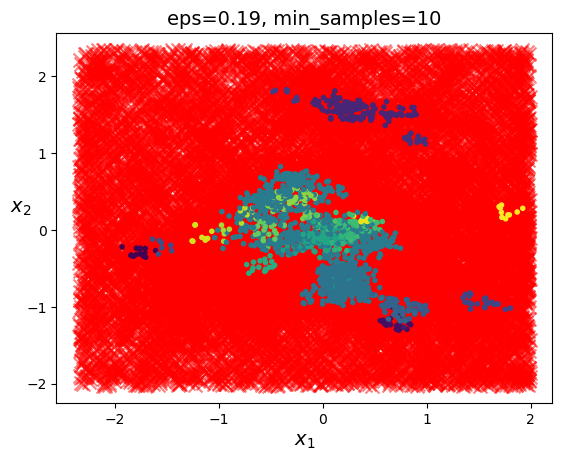

In [27]:
plot_dbscan(model, X_scaled, size=100)

### The clusters you identified are "statistical overdensities" which may or may not be real open clusters. In order to confirm that these overdensities are indeed open clusters, one will have to look at photometric and/or spectroscopic properties of the stars. We are not going to do this in this homework, but see the following papers if you are interested in.

https://ui.adsabs.harvard.edu/abs/2019A%26A...627A..35C/abstract

https://ui.adsabs.harvard.edu/abs/2020A%26A...640A...1C/abstract

https://ui.adsabs.harvard.edu/abs/2022A%26A...661A.118C/abstract





### 2. PCA and Neural Networks (6 pts)

In this homework problem, we will build a neural network that classifies galaxies based on their SDSS spectra (absorption galaxy, normal galaxy, emission galaxy). Let's first read in SDSS spectra. You can find the data file in the HiPerGator class share folder as well as on Canvas.

In [28]:
import numpy as np

data = np.load('sdss_spectra.npz')
data.files

['wavelengths', 'X', 'y', 'labels', 'z']

The data contains the wavelengths (wavelengths), 3794 spectra (X), classification in integer (y), classification in string (labels), and redshift (z). Let's inspect the data.

In [29]:
data['wavelengths']

array([3162.2776, 3165.1917, 3168.1082, 3171.0273, 3173.9495, 3176.874 ,
       3179.8015, 3182.7314, 3185.6643, 3188.5996, 3191.5378, 3194.4788,
       3197.4224, 3200.3687, 3203.3176, 3206.2693, 3209.2239, 3212.181 ,
       3215.1409, 3218.1035, 3221.0688, 3224.0369, 3227.0076, 3229.9812,
       3232.9575, 3235.9365, 3238.9185, 3241.9028, 3244.8901, 3247.8801,
       3250.873 , 3253.8684, 3256.867 , 3259.868 , 3262.8718, 3265.8784,
       3268.8877, 3271.9   , 3274.9148, 3277.9324, 3280.953 , 3283.976 ,
       3287.0022, 3290.031 , 3293.0627, 3296.0972, 3299.1343, 3302.1743,
       3305.2173, 3308.2627, 3311.3113, 3314.3625, 3317.4165, 3320.4734,
       3323.533 , 3326.5955, 3329.661 , 3332.729 , 3335.8   , 3338.8738,
       3341.9504, 3345.0298, 3348.112 , 3351.1973, 3354.2854, 3357.3762,
       3360.4697, 3363.5664, 3366.6658, 3369.768 , 3372.873 , 3375.981 ,
       3379.0918, 3382.2056, 3385.322 , 3388.4417, 3391.564 , 3394.689 ,
       3397.8171, 3400.948 , 3404.0818, 3407.2185, 

In [30]:
data['X']

array([[ 4.9201283,  5.1662374,  6.073041 , ...,  7.5093303,  7.970523 ,
         7.9843907],
       [ 2.189293 ,  2.1868663,  2.1844583, ..., 12.837092 , 12.934673 ,
        12.810533 ],
       [ 2.7451353,  2.738469 ,  3.368032 , ...,  9.2907915,  9.108875 ,
         8.385379 ],
       ...,
       [ 1.7720324,  2.0300677,  2.2360272, ...,  4.777608 ,  7.0639305,
         5.7977986],
       [ 4.4983783,  5.072573 ,  5.6672626, ..., 21.518795 , 19.828224 ,
        20.714499 ],
       [ 3.9174566,  4.1198335,  5.0055575, ..., 14.062734 , 16.002117 ,
        15.691873 ]], dtype=float32)

In [31]:
data['X'].shape

(3794, 1000)

In [32]:
data['y']

array([2, 1, 1, ..., 2, 0, 2], dtype=int32)

In [33]:
np.unique(data['y'])

array([0, 1, 2], dtype=int32)

In [34]:
data['labels']

array(['absorption galaxy', 'galaxy', 'emission galaxy'], dtype='<U17')

Let's standardize the data and make a plot showing the averaged spectrum of each class.

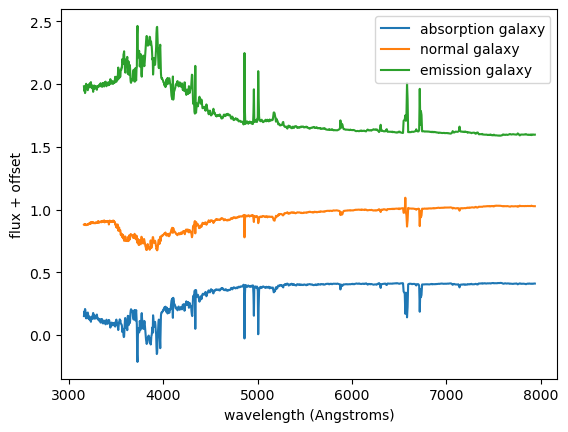

In [37]:
from sklearn.preprocessing import StandardScaler

X = data['X']
y = data['y']
Xs = StandardScaler().fit_transform(X)

plt.plot(data['wavelengths'], np.mean(Xs[y == 0,:],axis=0), label='absorption galaxy')
plt.plot(data['wavelengths'], np.mean(Xs[y == 1,:],axis=0)+1, label='normal galaxy')
plt.plot(data['wavelengths'], np.mean(Xs[y == 2,:],axis=0)+2, label='emission galaxy')
plt.xlabel('wavelength (Angstroms)')
plt.ylabel('flux + offset')
plt.legend()

(a) Now that we have inspected the data, let's build a neural network. Using ```tensorflow.keras```, build a neural network that has two hidden layers each of which has 1,000 neurons. It's always a good practice to check the model summary. Compile the model using loss="sparse_categorical_crossentropy", Adam optimizer, and learning rate = 1.0e-3. Then, train the model for 100 epochs. Record the time it took for training. (1 pt)

In [ ]:
# moving to hpg because of keras
















(b) Make plots showing training loss, validation loss, training accuracy, validation accuray. (1 pt)

(c) The original data lives in a 1,000 dimensional space. Let's reduce the dimension using PCA. Choose the number of PCs such that you preserve 99% of the variance in the original data. How many dimensions did you end up with? (1 pt)

(d) Make a plot showing the averaged inverse transformed spectrum of each class. How do they compare with the plot you made earlier? (1 pt)

(e) Build a new neural network, using the same architecture, optimizer, learning rate, number of epochs as in (a), and train it. How does the number of trainable parameters compare? How does the training time compare? Do you see the benefit of PCA? (1 pt)

(f) Make plots showing training loss, validation loss, training accuracy, validation accuray, similar to (b). Did you get a comparable accucary? (1 pt)